In [27]:
import pandas as pd
from tabulate import tabulate
import numpy as np
from itertools import combinations
from tqdm import tqdm
import matplotlib.pyplot as plt

In [11]:
men_data = pd.read_csv('men_1_14_3.csv')
women_data = pd.read_csv('women_1_14_3.csv')

# Brute Force Method

## Function to Filter Athletes

In [12]:
def select_top_men_athletes_by_country(country, top_n=25):
    # Filter the DataFrame for only the athletes from the specified country
    country_athletes = men_data[men_data['Country'] == country]

    # Sort the athletes by 'mean_score_of_all' in descending order
    sorted_country_athletes = country_athletes.sort_values('mean_score_of_all', ascending=False)

    # If there are more than 'top_n' athletes, drop the ones with the lowest mean scores
    if len(sorted_country_athletes) > top_n:
        # Find the indices of athletes that are not in the top 'top_n'
        athletes_to_drop = sorted_country_athletes.iloc[top_n:].index
        # Drop these athletes from the original DataFrame
        men_data.drop(athletes_to_drop, inplace=True)

def select_top_women_athletes_by_country(country, top_n=25):
    # Filter the DataFrame for only the athletes from the specified country
    country_athletes = women_data[women_data['Country'] == country]

    # Sort the athletes by 'mean_score_of_all' in descending order
    sorted_country_athletes = country_athletes.sort_values('mean_score_of_all', ascending=False)

    # If there are more than 'top_n' athletes, drop the ones with the lowest mean scores
    if len(sorted_country_athletes) > top_n:
        # Find the indices of athletes that are not in the top 'top_n'
        athletes_to_drop = sorted_country_athletes.iloc[top_n:].index
        # Drop these athletes from the original DataFrame
        women_data.drop(athletes_to_drop, inplace=True)


In [13]:
men_country_list_no_usa=['CHN','JPN','GBR','CAN','GER','ITA','SUI','ESP','TUR','NED','UKR']
women_country_list_no_usa=['GBR','CAN','CHN','BRA','ITA','NED','FRA','JPN','AUS','ROU','KOR']
men_country_list=['USA','CHN','JPN','GBR','CAN','GER','ITA','SUI','ESP','TUR','NED','UKR']
women_country_list=['USA','GBR','CAN','CHN','BRA','ITA','NED','FRA','JPN','AUS','ROU','KOR']

In [14]:
for country in men_country_list_no_usa:
    select_top_men_athletes_by_country(country)
for country in women_country_list_no_usa:
    select_top_women_athletes_by_country(country)

select_top_men_athletes_by_country('USA',40)
select_top_women_athletes_by_country('USA',40)

## Function to find each country's best team

In [15]:
men_apparatus_list = ['FX','HB','PB','PH','SR','VT']
women_apparatus_list = ['FX','UB','BB','VT']

In [16]:
def find_men_best_team_score(country):
    best_combo = None
    max_score = float('-inf')  # Initialize max_score to negative infinity to ensure any sum will be larger

    # Filter the DataFrame for only the athletes from the specified country
    men_country_data = men_data[men_data['Country'] == country]
    
    # Generate all combinations of 5 athletes from the filtered DataFrame
    athlete_combinations = list(combinations(men_country_data.index, 5))

    # Iterate over all possible combinations of 5 athletes
    for combo in tqdm(athlete_combinations):
        # Retrieve the rows for the athletes in the current combination
        current_combo_df = men_country_data.loc[list(combo)]
        
        # Calculate the score for the current combination
        total_sum = 0
        for apparatus in men_apparatus_list:
            apparatus_score_column = f'{apparatus}_mean_score'
            current_combo_df = current_combo_df.sort_values(by=apparatus_score_column, ascending=False)
            total_sum += current_combo_df.head(3)[apparatus_score_column].sum()

        # Check if the current combination has a better total sum than the current best
        if total_sum > max_score:
            max_score = total_sum
            best_combo = list(combo)

    best_combo_df = men_country_data.loc[list(best_combo)]
    for apparatus in men_apparatus_list:
        str = apparatus+'_mean_score'
        best_combo_df=best_combo_df.sort_values(str,ascending=False)
        best_combo_df.loc[best_combo_df.tail(2).index, str] = 0
    print(country+"'s top 5 athelets and their score")
    print(tabulate(best_combo_df[['name','FX_mean_score','HB_mean_score','PB_mean_score','PH_mean_score','SR_mean_score','VT_mean_score']], headers='keys', tablefmt='pretty'))
    total_sum = round(best_combo_df.iloc[:, 1:].sum(axis=1).sum(),2)
    print(country+"'s score sum is:", max_score)
    return round(max_score, 2)

In [17]:
def find_women_best_team_score(country):
    best_combo = None
    max_score = float('-inf')  # Initialize max_score to negative infinity to ensure any sum will be larger

    # Filter the DataFrame for only the athletes from the specified country
    women_country_data = women_data[women_data['Country'] == country]
    
    # Generate all combinations of 5 athletes from the filtered DataFrame
    athlete_combinations = list(combinations(women_country_data.index, 5))

    # Iterate over all possible combinations of 5 athletes
    for combo in tqdm(athlete_combinations):
        # Retrieve the rows for the athletes in the current combination
        current_combo_df = women_country_data.loc[list(combo)]
        
        # Calculate the score for the current combination
        total_sum = 0
        for apparatus in women_apparatus_list:
            apparatus_score_column = f'{apparatus}_mean_score'
            current_combo_df = current_combo_df.sort_values(by=apparatus_score_column, ascending=False)
            total_sum += current_combo_df.head(3)[apparatus_score_column].sum()

        # Check if the current combination has a better total sum than the current best
        if total_sum > max_score:
            max_score = total_sum
            best_combo = list(combo)

    best_combo_df = women_country_data.loc[list(best_combo)]
    for apparatus in women_apparatus_list:
        str = apparatus+'_mean_score'
        best_combo_df=best_combo_df.sort_values(str,ascending=False)
        best_combo_df.loc[best_combo_df.tail(2).index, str] = 0
    print(country+"'s top 5 athelets and their score")
    print(tabulate(best_combo_df[['name','FX_mean_score','UB_mean_score','BB_mean_score','VT_mean_score']], headers='keys', tablefmt='pretty'))
    total_sum = round(best_combo_df.iloc[:, 1:].sum(axis=1).sum(),2)
    print(country+"'s score sum is:", max_score)
    return round(max_score, 2)

## Find all important countries' best team and score, then rank them

### Women's (No USA)

In [18]:
# women_countries_score = pd.DataFrame()
# women_countries_score['country']=women_country_list_no_usa
# women_score_list=[]
# for country in women_country_list_no_usa:
#     women_score_list.append(find_women_best_team_score(country))
# women_countries_score['team_score']=women_score_list
# women_countries_score.sort_values('team_score',ascending=False)

### Men's (No USA)

In [19]:
# men_countries_score = pd.DataFrame()
# men_countries_score['country']=men_country_list_no_usa
# men_score_list=[]
# for country in men_country_list_no_usa:
#     men_score_list.append(find_men_best_team_score(country))
# men_countries_score['team_score']=men_score_list
# men_countries_score.sort_values('team_score',ascending=False)

## For USA, find top 5 combinations for both men and women

In [20]:
def find_men_top_5_combinations(country):
    top_combinations = []

    # Filter the DataFrame for only the athletes from the specified country
    men_country_data = men_data[men_data['Country'] == country]
    
    # Generate all combinations of 5 athletes from the filtered DataFrame
    athlete_combinations = combinations(men_country_data.index, 5)

    # Iterate over all possible combinations of 5 athletes
    for combo in tqdm(athlete_combinations, desc=f"Finding top 5 combinations for {country}"):
        # Retrieve the rows for the athletes in the current combination
        current_combo_df = men_country_data.loc[list(combo)]
        
        # Calculate the score for the current combination
        total_sum = 0
        for apparatus in men_apparatus_list:
            apparatus_score_column = f'{apparatus}_mean_score'
            # Select the top 3 scores for each apparatus
            top_scores = current_combo_df[apparatus_score_column].nlargest(3)
            total_sum += top_scores.sum()

        # Store the combination (by athlete names) and its total score
        top_combinations.append((current_combo_df['name'].tolist(), total_sum))

    # Sort the combinations by their scores in descending order and take the top 5
    top_5_combinations = sorted(top_combinations, key=lambda x: x[1], reverse=True)[:5]

    # Print out the top 5 combinations
    for names, score in top_5_combinations:
        print(f"\nCombination: {', '.join(names)}, Total Score: {score}")
        current_combo_df = men_country_data[men_country_data['name'].isin(names)]
        mean_score_columns = [f'{app}_mean_score' for app in men_apparatus_list]
        table = current_combo_df[['name'] + mean_score_columns]
        
        print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))
    return table


In [21]:
def find_women_top_5_combinations(country):
    top_combinations = []

    # Filter the DataFrame for only the athletes from the specified country
    women_country_data = women_data[women_data['Country'] == country]
    
    # Generate all combinations of 5 athletes from the filtered DataFrame
    athlete_combinations = combinations(women_country_data.index, 5)

    # Iterate over all possible combinations of 5 athletes
    for combo in tqdm(athlete_combinations, desc=f"Finding top 5 combinations for {country}"):
        # Retrieve the rows for the athletes in the current combination
        current_combo_df = women_country_data.loc[list(combo)]
        
        # Calculate the score for the current combination
        total_sum = 0
        for apparatus in women_apparatus_list:
            apparatus_score_column = f'{apparatus}_mean_score'
            # Select the top 3 scores for each apparatus
            top_scores = current_combo_df[apparatus_score_column].nlargest(3)
            total_sum += top_scores.sum()

        # Store the combination (by athlete names) and its total score
        top_combinations.append((current_combo_df['name'].tolist(), total_sum))

    # Sort the combinations by their scores in descending order and take the top 5
    top_5_combinations = sorted(top_combinations, key=lambda x: x[1], reverse=True)[:5]

    # Print out the top 5 combinations
    for names, score in top_5_combinations:
        print(f"\nCombination: {', '.join(names)}, Total Score: {score}")
        current_combo_df = women_country_data[women_country_data['name'].isin(names)]
        mean_score_columns = [f'{app}_mean_score' for app in women_apparatus_list]
        table = current_combo_df[['name'] + mean_score_columns]
        
        print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))
    return table

In [22]:
#top_5_usa_men_comb = find_men_top_5_combinations('USA')
#top_5_usa_women_comb = find_women_top_5_combinations('USA')

# Greedy Algorithm

**Why do we need this algorithm?**

The brute force enumeratio method is guaranteed to find the global maximum for total score, but its need of vast computing resources limits its abilities to enumerate all possibilities for countreis with large numbers of candidates. This means that it will exclude edge cases where athletes perform exceptionally in some areas and poorly in others. Therefore, we came up with a supplementary greedy strategy which involves selecting well-rounded athletes and adding them to the team one-by-one, evaluating the total team score after each addition. This method is more efficient but may overlook globally optimal combinations. This alternative method provided the same optimal solution as enumeration 85% of the time.

In [33]:
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('men_1_14_3.csv') # read cleaned data file

## Get Standardized Scores
Qe will standardize the scores for each apparatus to compare the relative performance of each apparatus for each subject, which will serve as selection criteria for all-rounded athletes.

In [34]:
# Get standardized scores for all apparatus, all athletes

scaler = StandardScaler()

# Use this for men
standardized_athletes = data[['name','FX_mean_score','HB_mean_score','PB_mean_score','PH_mean_score','SR_mean_score','VT_mean_score']]
standardized_athletes.iloc[:, -6:] = scaler.fit_transform(standardized_athletes.iloc[:, -6:])

# # Use this for women
# standardized_athletes = data[['name','UB_mean_score','BB_mean_score','FX_mean_score','VT_mean_score']]
# standardized_athletes.iloc[:, -4:] = scaler.fit_transform(standardized_athletes.iloc[:, -4:])

standardized_athletes = standardized_athletes.merge(data[['name','Country']], on='name', how='left')  # Assign the result of merge operation back to standardized_athletes
standardized_athletes.head()

/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/1634176277.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standardized_athletes.iloc[:, -6:] = scaler.fit_transform(standardized_athletes.iloc[:, -6:])


,name,FX_mean_score,HB_mean_score,PB_mean_score,PH_mean_score,SR_mean_score,VT_mean_score,Country
0,BOHENG ZHANG,0.918346,1.059224,1.033662,0.997092,0.934456,0.840374,CHN
1,KAZUMA KAYA,0.813571,0.981859,0.977475,1.093904,0.910087,0.811714,JPN
2,WATARU TANIGAWA,0.831330,0.957243,1.006420,0.980653,0.922271,0.856296,JPN
3,CONG SHI,0.818899,1.022300,1.003014,0.976999,0.955343,0.736882,CHN
4,DAIKI HASHIMOTO,0.888157,1.078565,0.735698,1.004399,0.896163,0.854703,JPN


## Helper functions for finding optimal group
We will define `score_with_added_athlete` to find the score of a group when an athlete is added, and `find_optimal_group` to find the optimal group of athletes when given a list of already selected athletes and remaining athletes.

In [35]:
def score_with_added_athlete(existing_athletes, new_athlete, df):
    
    '''
    Function to calculate the score when a new athlete is added to a team
    input: existing atheles, new athlete, data frame
    output: best athlete to add, resulting total score
    
    '''
    appended_df = df[df['name'].isin(existing_athletes + [new_athlete])] # append new athlete to list
    appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(col.isin(col.nlargest(3)), 0), axis=0) # select top 3 scores
    appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(~col.duplicated(), 0), axis=0) # set one duplicate value to 0
    total_sum = round(appended_df.iloc[:, 1:].sum(axis=1).sum(),2) # get new sum
    return appended_df,total_sum # return total sum score

def get_next_best_athlete(existing_athletes,remaining_athletes, df):
    
    '''
    Function to get the next best athlete to add to the team
    input: existing atheles, remaining athletes, data frame
    output: best athlete to add, resulting total score
    
    '''
    added_results = pd.DataFrame(columns=['name','total score','results'])
    for i, athlete in enumerate(remaining_athletes['name']):
        full_table, total_sum = score_with_added_athlete(existing_athletes, athlete, df)
        # print(athlete,_, total_sum)
        # print(athlete, full_table)
        added_results.loc[i] = [athlete, total_sum, full_table]
    scores = added_results.sort_values(by='total score', ascending=False)
    best_athlete = scores.iloc[0,0]
    return scores, best_athlete

## Functions to select teams that optimize total scores for each country
We adopt a greedy approach to select the team of athletes that optimize the total score for each country. We will first select 1(women) or 3(men) athlete that has the highest overall score for each apparatus, and then select the next best athlete that has the highest score for the apparatus that has the lowest score for the team. We will repeat this process until we have selected 5 athletes for each country.

Run the function labeled with the sex of athletes to predict.

In [36]:
# Use this for men
def get_team(country):
    country_athletes =  data[data['Country']== country]

    # Select according apparatus and scores -------------------------------
    country_athletes = country_athletes[['name','FX_mean_score','HB_mean_score','PB_mean_score','PH_mean_score','SR_mean_score','VT_mean_score']]

    # Step 1: Select top 3 all-rounded athletes for the team --------------------------------
    # Select only athletes who have competed more than 4 apparatus
    columns_to_check = country_athletes.columns[-6:]
    attneded_more_than_4_apparatus = (country_athletes[columns_to_check] != 0).sum(axis=1) >=4
    athletes = country_athletes[attneded_more_than_4_apparatus]['name']
    stand_scores = standardized_athletes[standardized_athletes['name'].isin(athletes)].drop(columns=['Country'])

    # Set 2 lowest values in each row to 0
    stand_scores.iloc[:, 1:] = stand_scores.iloc[:, 1:].apply(lambda row: row.where(row.index.isin(row.nlargest(len(row)-2).index), 0), axis=1)
    stand_scores['total_score'] = stand_scores.iloc[:, 1:].sum(axis=1)
    stand_scores = stand_scores.sort_values(by='total_score', ascending=False)
    best_3_all_rounded = stand_scores.sort_values(by='total_score', ascending=False).head(3)['name'].tolist()
    # best_3_all_rounded

    # Step 2: Select 4th athlete that maximizes the score --------------------------------
    # Select athletes who have not been selected in step 1
    remaining_athletes = country_athletes[~country_athletes['name'].isin(best_3_all_rounded)]
    # print('running step: 4')
    best_4_scores, fourth_best = get_next_best_athlete(best_3_all_rounded,remaining_athletes, country_athletes)
    best_4_all_rounded = best_3_all_rounded + [fourth_best]
    # best_4_all_rounded

    # Step 3: Select 5th athlete that maximizes the score --------------------------------
    remaining_athletes = country_athletes[~country_athletes['name'].isin(best_4_all_rounded)]
    # print('running step: 5')
    best_5_scores, fifth_best = get_next_best_athlete(best_4_all_rounded,remaining_athletes, country_athletes)
    best_5_all_rounded = best_4_all_rounded + [fifth_best]
    # best_5_all_rounded, best_5_scores

    final_team = best_5_scores[best_5_scores['name']==fifth_best]['results'].values[0] # final team & their scores
    highest_score = max(best_5_scores['total score']) # highest score
    
    return best_5_all_rounded, highest_score, final_team


In [37]:
# # Use this for women
# def get_team(country):
#     country_athletes =  data[data['Country']== country] # use china men for example

#     # Select according apparatus and scores -------------------------------
#     country_athletes = country_athletes[['name','UB_mean_score','BB_mean_score','FX_mean_score','VT_mean_score']]    

#     # Step 1: Select top 1 all-rounded athlete for the team --------------------------------
#     # Select only athletes who have competed more than 4 apparatus
#     columns_to_check = country_athletes.columns[-4:]
#     attneded_more_than_4_apparatus = (country_athletes[columns_to_check] != 0).sum(axis=1) >=3
#     athletes = country_athletes[attneded_more_than_4_apparatus]['name']
#     stand_scores = standardized_athletes[standardized_athletes['name'].isin(athletes)].drop(columns=['Country'])

#     # Set 1 lowest values in each row to 0
#     stand_scores.iloc[:, 1:] = stand_scores.iloc[:, 1:].apply(lambda row: row.where(row.index.isin(row.nlargest(len(row)-1).index), 0), axis=1)
#     stand_scores['total_score'] = stand_scores.iloc[:, 1:].sum(axis=1)
#     stand_scores = stand_scores.sort_values(by='total_score', ascending=False)
#     best_1_all_rounded = stand_scores.sort_values(by='total_score', ascending=False).head(1)['name'].tolist()
#     # best_3_all_rounded
#     # print(pd.DataFrame(stand_scores))
    
#     # Step 2: Select 2th athlete that maximizes the score --------------------------------
#     remaining_athletes = country_athletes[~country_athletes['name'].isin(best_1_all_rounded)]
#     best_2_scores, second_best = get_next_best_athlete(best_1_all_rounded,remaining_athletes, country_athletes)
#     best_2_all_rounded = best_1_all_rounded + [second_best]
    
#     # Step 3: Select 3th athlete that maximizes the score --------------------------------
#     remaining_athletes = country_athletes[~country_athletes['name'].isin(best_2_all_rounded + [second_best])]
#     best_3_scores, third_best = get_next_best_athlete(best_2_all_rounded + [second_best],remaining_athletes, country_athletes)
#     best_3_all_rounded = best_2_all_rounded + [third_best]

#     # Step 4: Select 4th athlete that maximizes the score --------------------------------
#     # Select athletes who have not been selected in step 1
#     remaining_athletes = country_athletes[~country_athletes['name'].isin(best_3_all_rounded)]
#     # print('running step: 4')
#     best_4_scores, fourth_best = get_next_best_athlete(best_3_all_rounded,remaining_athletes, country_athletes)
#     best_4_all_rounded = best_3_all_rounded + [fourth_best]
#     # best_4_all_rounded

#     # Step 3: Select 5th athlete that maximizes the score --------------------------------
#     remaining_athletes = country_athletes[~country_athletes['name'].isin(best_4_all_rounded)]
#     # print('running step: 5')
#     best_5_scores, fifth_best = get_next_best_athlete(best_4_all_rounded,remaining_athletes, country_athletes)
#     best_5_all_rounded = best_4_all_rounded + [fifth_best]
#     # best_5_all_rounded, best_5_scores
#     final_team = best_5_scores[best_5_scores['name']==fifth_best]['results'].values[0] # final team & their scores
#     highest_score = max(best_5_scores['total score']) # highest score
    
#     return best_5_all_rounded, highest_score, final_team


## Select the best team for each country
We run the prediction of optimal teams for each country that qualified to the gymnastics team all-round competition for Olympics 2024.

In [38]:
men_country_list=['USA', 'CAN', 'GER', 'ITA', 'SUI', 'ESP', 'TUR', 'UKR', 'CHN', 'JPN', 'GBR','NED']
women_country_list=['CHN', 'BRA', 'ITA', 'NED', 'FRA', 'JPN', 'AUS', 'ROU', 'KOR', 'USA', 'GBR', 'CAN']

all_countries_predictions = pd.DataFrame(columns=['country','best_5_all_rounded','highest_score','final_team'])

# Use this for men
for i,country in enumerate(men_country_list):
    print('Running country: ', country)
    a,b,c = get_team(country)
    # print(c)
    all_countries_predictions.loc[i] = [country,a,b,c]

# # Use this for women
# for i,country in enumerate(women_country_list):
#     print('Running country: ', country)
#     a,b,c = get_team(country)
#     # print(c)
#     all_countries_predictions.loc[i] = [country,a,b,c]

Running country:  USA


/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(col.isin(col.nlargest(3)), 0), axis=0) # select top 3 scores
/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(~col.duplicated(), 0), axis=0) # set on

Running country:  CAN


/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(col.isin(col.nlargest(3)), 0), axis=0) # select top 3 scores
/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(~col.duplicated(), 0), axis=0) # set on

Running country:  GER


/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(~col.duplicated(), 0), axis=0) # set one duplicate value to 0
/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(col.isin(col.nlargest(3)), 0), axis=0)

Running country:  ITA


/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(col.isin(col.nlargest(3)), 0), axis=0) # select top 3 scores
/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(~col.duplicated(), 0), axis=0) # set on

Running country:  SUI


/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(~col.duplicated(), 0), axis=0) # set one duplicate value to 0
/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(col.isin(col.nlargest(3)), 0), axis=0)

Running country:  ESP


/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(col.isin(col.nlargest(3)), 0), axis=0) # select top 3 scores
/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(~col.duplicated(), 0), axis=0) # set on

Running country:  TUR


/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(~col.duplicated(), 0), axis=0) # set one duplicate value to 0
/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(col.isin(col.nlargest(3)), 0), axis=0)

Running country:  UKR


/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(col.isin(col.nlargest(3)), 0), axis=0) # select top 3 scores
/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(~col.duplicated(), 0), axis=0) # set on

Running country:  CHN


/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(~col.duplicated(), 0), axis=0) # set one duplicate value to 0
/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(col.isin(col.nlargest(3)), 0), axis=0)

Running country:  JPN


/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(~col.duplicated(), 0), axis=0) # set one duplicate value to 0
/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(col.isin(col.nlargest(3)), 0), axis=0)

Running country:  GBR


/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(col.isin(col.nlargest(3)), 0), axis=0) # select top 3 scores
/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(~col.duplicated(), 0), axis=0) # set on

Running country:  NED


/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(col.isin(col.nlargest(3)), 0), axis=0) # select top 3 scores
/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/3356565303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_df.iloc[:, 1:] = appended_df.iloc[:, 1:].apply(lambda col: col.where(~col.duplicated(), 0), axis=0) # set on

The `all_countries_predictions` dataframe now stores the predicted best team of 5 athletes and their calculated highest score.

In [39]:
all_countries_predictions.sort_values(by='highest_score', ascending=False)#.to_csv('Women_all_countries_ranking.csv', index=False)

,country,best_5_all_rounded,highest_score,final_team
8,CHN,"[BOHENG ZHANG, CONG SHI, HAO TIAN, XINGYU LAN,...",260.83,name FX_mean_score HB_mean_scor...
9,JPN,"[SHINNOSUKE OKA, KAZUMA KAYA, DAIKI HASHIMOTO,...",259.47,name FX_mean_score HB_mean_s...
0,USA,"[BRODY MALONE, VITALIY GUIMARAES, PAUL JUDA, A...",254.90,name FX_mean_score HB_mean_...
10,GBR,"[JOE FRASER, GIARNNI REGINI MORAN, JAKE JARMAN...",252.04,name FX_mean_score HB_m...
6,TUR,"[ADEM ASIL, FERHAT ARICAN, EMRE DODANLI, MEHME...",248.54,name FX_mean_score HB_me...
7,UKR,"[ILLIA KOVTUN, PETRO PAKHNIUK, OLEG VERNIAIEV,...",247.65,name FX_mean_score HB_mean_...
3,ITA,"[NICOLA BARTOLINI, YUMIN ABBADINI, LORENZO BON...",246.80,name FX_mean_score HB_mean...
4,SUI,"[CHRISTIAN BAUMANN, DOMINIC TAMSEL, NOE SEIFER...",245.88,name FX_mean_score HB_me...
2,GER,"[LUKAS DAUSER, ANDREAS TOBA, ANDREAS TOBA, PAS...",244.59,name FX_mean_score HB_mean_sc...
1,CAN,"[FELIX DOLCI, RENE COURNOYER, WILLIAM EMARD, J...",244.17,name FX_mean_score HB_mean_...


## Specific Case Analysis

In [23]:
list_of_names = ['SIMONE BILES', 'SHILESE JONES', 'KONNOR MCCLAIN', 'KALIYA LINCOLN', 'JADE CAREY']
selected_df = women_data.loc[women_data['name'].isin(list_of_names)]

total_sum = 0
for apparatus in women_apparatus_list:
    apparatus_score_column = f'{apparatus}_mean_score'
    selected_df = selected_df.sort_values(by=apparatus_score_column, ascending=False)
    str = apparatus+'_mean_score'
    selected_df.loc[selected_df.tail(2).index, str] = 0
selected_df=selected_df[['name','FX_mean_score','BB_mean_score','UB_mean_score','VT_mean_score']]
print(tabulate(selected_df[['name','FX_mean_score','BB_mean_score','UB_mean_score','VT_mean_score']], headers='keys', tablefmt='pretty'))
total_sum = round(selected_df.iloc[:, 1:].sum(axis=1).sum(),2)
print("Total Score: ", total_sum)

+----+----------------+---------------+---------------+---------------+---------------+
|    |      name      | FX_mean_score | BB_mean_score | UB_mean_score | VT_mean_score |
+----+----------------+---------------+---------------+---------------+---------------+
| 0  |  SIMONE BILES  |     14.87     |     14.6      |     14.26     |     14.98     |
| 7  |   JADE CAREY   |     13.8      |      0.0      |      0.0      |     14.5      |
| 2  | SHILESE JONES  |      0.0      |     13.32     |     14.51     |     14.29     |
| 3  | KONNOR MCCLAIN |      0.0      |     14.5      |     13.27     |      0.0      |
| 43 | KALIYA LINCOLN |     14.01     |      0.0      |      0.0      |      0.0      |
+----+----------------+---------------+---------------+---------------+---------------+
Total Score:  170.91


In [24]:
list_of_names = ['BRODY MALONE', 'VITALIY GUIMARAES', 'PAUL JUDA', 'YUL MOLDAUER', 'ASHER HONG']  # Replace these with the names you want to select
selected_df = men_data.loc[men_data['name'].isin(list_of_names)]

total_sum = 0
for apparatus in men_apparatus_list:
    apparatus_score_column = f'{apparatus}_mean_score'
    selected_df = selected_df.sort_values(by=apparatus_score_column, ascending=False)
    str = apparatus+'_mean_score'
    selected_df.loc[selected_df.tail(2).index, str] = 0
selected_df=selected_df[['name','FX_mean_score','HB_mean_score','PB_mean_score','PH_mean_score','SR_mean_score','VT_mean_score']]
print(tabulate(selected_df[['name','FX_mean_score','HB_mean_score','PB_mean_score','PH_mean_score','SR_mean_score','VT_mean_score']], headers='keys', tablefmt='pretty'))
total_sum = round(selected_df.iloc[:, 1:].sum(axis=1).sum(),2)
print("Total Score: ", total_sum)

+----+-------------------+---------------+---------------+---------------+---------------+---------------+---------------+
|    |       name        | FX_mean_score | HB_mean_score | PB_mean_score | PH_mean_score | SR_mean_score | VT_mean_score |
+----+-------------------+---------------+---------------+---------------+---------------+---------------+---------------+
| 9  |     PAUL JUDA     |     14.34     |     13.92     |      0.0      |     13.45     |      0.0      |     14.5      |
| 23 |    ASHER HONG     |      0.0      |      0.0      |     14.61     |      0.0      |     14.15     |     14.49     |
| 5  |   BRODY MALONE    |      0.0      |     14.37     |     14.5      |     13.65     |     13.87     |     14.47     |
| 7  | VITALIY GUIMARAES |     14.25     |     13.4      |      0.0      |     14.35     |      0.0      |      0.0      |
| 21 |   YUL MOLDAUER    |     14.07     |      0.0      |     14.54     |      0.0      |     13.97     |      0.0      |
+----+----------

### Picking 3 from the final 6 for men's team

In [26]:
combination_scores = []
# Filter the DataFrame for only the athletes from the specified country
USA_selection_all = men_data[men_data['name'].isin(['BRODY MALONE','PAUL JUDA','VITALIY GUIMARAES','YUL MOLDAUER','ASHER HONG','CURRAN PHILLIPS','STEPHEN NEDOROSCIK','KHOI YOUNG'])]
USA_selection = men_data[men_data['name'].isin(['VITALIY GUIMARAES','YUL MOLDAUER','ASHER HONG','CURRAN PHILLIPS','STEPHEN NEDOROSCIK','KHOI YOUNG'])]
# Generate all combinations of 5 athletes from the filtered DataFrame
athlete_combinations = combinations(USA_selection.index, 3)
# Iterate over all possible combinations of 5 athletes
fixed_two = men_data[men_data['name'].isin(['BRODY MALONE', 'PAUL JUDA'])]
for combo in tqdm(athlete_combinations, desc=f"Finding top 5 combinations for {country}"):
        # Retrieve the rows for the athletes in the current combination
    current_combo_df = USA_selection.loc[list(combo)]
    current_combo_df=pd.concat([fixed_two,current_combo_df],ignore_index=True)
    total_sum = 0
    for apparatus in men_apparatus_list:
        apparatus_score_column = f'{apparatus}_mean_score'
        current_combo_df = current_combo_df.sort_values(by=apparatus_score_column, ascending=False)
        str = apparatus+'_mean_score'
        current_combo_df.loc[current_combo_df.tail(2).index, str] = 0
    current_combo_df=current_combo_df[['name','FX_mean_score','PB_mean_score','HB_mean_score','PH_mean_score','SR_mean_score','VT_mean_score']]
    print(tabulate(current_combo_df[['name','FX_mean_score','PB_mean_score','HB_mean_score','PH_mean_score','SR_mean_score','VT_mean_score']], headers='keys', tablefmt='pretty'))
    total_sum = round(current_combo_df.iloc[:, 1:].sum(axis=1).sum(),2)
    combination_scores.append(total_sum)
    print("Total Score: ", total_sum)
combination_scores=sorted(combination_scores,reverse=True)


Finding top 5 combinations for KOR: 0it [00:00, ?it/s]

Finding top 5 combinations for KOR: 20it [00:00, 97.40it/s]

+---+-------------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   |       name        | FX_mean_score | PB_mean_score | HB_mean_score | PH_mean_score | SR_mean_score | VT_mean_score |
+---+-------------------+---------------+---------------+---------------+---------------+---------------+---------------+
| 3 |    KHOI YOUNG     |      0.0      |     14.02     |      0.0      |     13.97     |      0.0      |     14.69     |
| 1 |     PAUL JUDA     |     14.34     |      0.0      |     13.92     |      0.0      |     13.75     |     14.5      |
| 0 |   BRODY MALONE    |      0.0      |     14.5      |     14.37     |     13.65     |     13.87     |     14.47     |
| 2 | VITALIY GUIMARAES |     14.25     |      0.0      |     13.4      |     14.35     |      0.0      |      0.0      |
| 4 |   YUL MOLDAUER    |     14.07     |     14.54     |      0.0      |      0.0      |     13.97     |      0.0      |
+---+-------------------

# Individual All-Round

In [ ]:
men_data = pd.read_csv('men_1_14_3.csv')
women_data = pd.read_csv('women_1_14_3.csv')
men_data.drop('Unnamed: 0',axis=1,inplace=True)
women_data.drop('Unnamed: 0',axis=1,inplace=True)
men_data_ind = men_data[['name', 'Country', 'Standardized_Score_Sum']]
women_data_ind = women_data[['name', 'Country', 'Standardized_Score_Sum']]
men_data_ind['Rank'] = men_data_ind['Standardized_Score_Sum'].rank(ascending=False)
women_data_ind['Rank'] = women_data_ind['Standardized_Score_Sum'].rank(ascending=False)

In [ ]:
men_data_ind.head(10)

In [ ]:
men_data_ind[men_data_ind['Country']=='USA'].head(10)

In [ ]:
women_data_ind.head(10)

In [ ]:
women_data_ind[women_data_ind['Country']=='USA'].head(20)

# Important Individual Analysis

In [29]:
men_raw = pd.read_csv('men_raw_1_14_2.csv')

In [30]:
curran_df = men_raw[men_raw['name']=='CURRAN PHILLIPS'][men_raw['Apparatus']=='PB'].sort_values('Score',ascending=False)
ste_df = men_raw[men_raw['name']=='STEPHEN NEDOROSCIK'][men_raw['Apparatus']=='PH'].sort_values('Score',ascending=False)

/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/479486810.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curran_df = men_raw[men_raw['name']=='CURRAN PHILLIPS'][men_raw['Apparatus']=='PB'].sort_values('Score',ascending=False)
/var/folders/fw/wm6zk0bn6zl7f1w96md8mwt40000gn/T/ipykernel_4995/479486810.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ste_df = men_raw[men_raw['name']=='STEPHEN NEDOROSCIK'][men_raw['Apparatus']=='PH'].sort_values('Score',ascending=False)


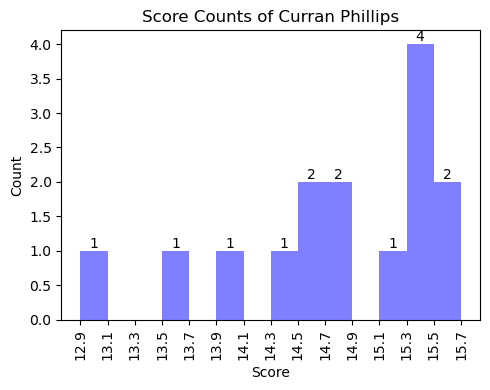

In [31]:
min_score = curran_df['Score'].min()
max_score = curran_df['Score'].max()
bins = np.arange(min_score - min_score % 0.1, max_score + 0.3, 0.2)

# Create the histogram again with the correct bins
plt.figure(figsize=(5, 4))
n, bins, patches = plt.hist(curran_df['Score'], bins=bins, color='blue', alpha=0.5)

# Adding count above each bar
for count, rect in zip(n, patches):
    if count > 0: 
        plt.text(rect.get_x() + rect.get_width()/2., count, f'{int(count)}', ha='center', va='bottom')

plt.title('Score Counts of Curran Phillips')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(bins, rotation=90)
plt.tight_layout()
plt.show()

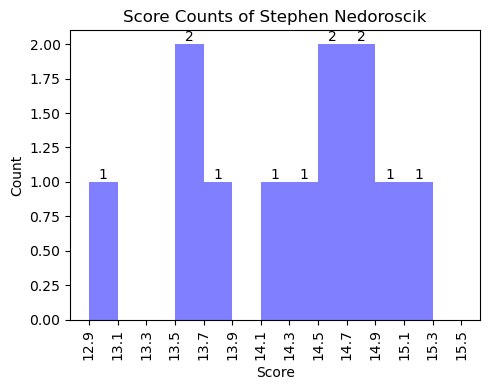

In [32]:
# Recalculate the bins with numpy now imported
min_score = ste_df['Score'].min()
max_score = ste_df['Score'].max()
bins = np.arange(min_score - min_score % 0.1, max_score + 0.3, 0.2)

# Create the histogram again with the correct bins
plt.figure(figsize=(5, 4))
n, bins, patches = plt.hist(ste_df['Score'], bins=bins, color='blue', alpha=0.5)

# Adding count above each bar
for count, rect in zip(n, patches):
    if count > 0:  # Only place text above non-zero bars
        plt.text(rect.get_x() + rect.get_width()/2., count, f'{int(count)}', ha='center', va='bottom')

plt.title('Score Counts of Stephen Nedoroscik')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(bins, rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of x-labels
plt.show()